# User Badge Assignment Notebook

This notebook contains the work I did on creating badges for learners based on thier Activities on the Learning Management System (LMS).

- This work aims to cluster learners (in this case users) based on their activity data and assign badges accordingly. 
- The activity data includes features such as the number of modules and quizzes completed, and the frequency of these completions over a month.

## Prepare Data
### Import

In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt #import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

In [39]:
### Load Data
data = pd.read_csv("Badge_Data.csv")

data.head()

,user_id,modules_completed,modeule_frequency,quizzes_completed,quizzes_frequency
0,3022,39,6,3,1
1,507,4,3,0,0
2,2346,30,9,2,1
3,1515,14,7,22,12
4,1234,13,11,8,8


In [40]:
df = data

### Explore

In [5]:
data.shape

(2534, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   user_id            2534 non-null   int64
 1   modules_completed  2534 non-null   int64
 2   modeule_frequency  2534 non-null   int64
 3   quizzes_completed  2534 non-null   int64
 4   quizzes_frequency  2534 non-null   int64
dtypes: int64(5)
memory usage: 99.1 KB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,2534.0,1915.110892,952.358602,205.0,1139.25,1988.5,2712.75,3548.0
modules_completed,2534.0,22.549329,21.758802,0.0,8.00,17.0,30.00,240.0
modeule_frequency,2534.0,8.169298,4.401413,0.0,5.00,8.0,11.00,24.0
quizzes_completed,2534.0,8.752565,14.309917,0.0,0.00,3.0,12.00,245.0
quizzes_frequency,2534.0,3.905288,4.574741,0.0,0.00,2.0,6.75,23.0


### Visualizations

C:\Users\ikenna\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ikenna\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ikenna\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ikenna\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

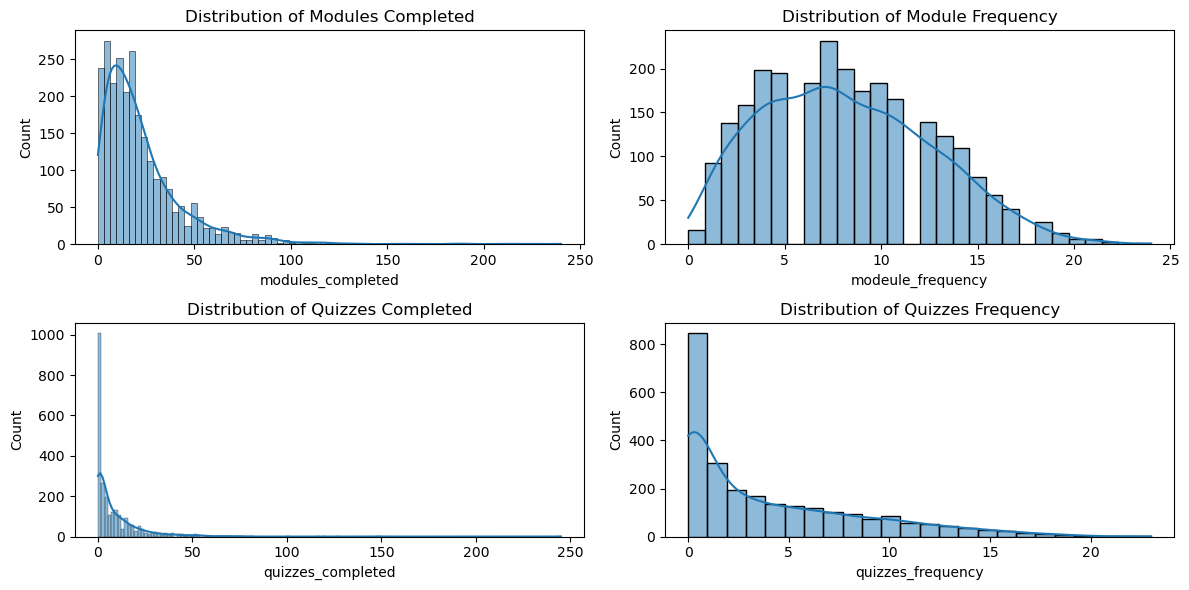

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data['modules_completed'], kde=True)
plt.title('Distribution of Modules Completed')

plt.subplot(2, 2, 2)
sns.histplot(data['modeule_frequency'], kde=True)
plt.title('Distribution of Module Frequency')

plt.subplot(2, 2, 3)
sns.histplot(data['quizzes_completed'], kde=True)
plt.title('Distribution of Quizzes Completed')

plt.subplot(2, 2, 4)
sns.histplot(data['quizzes_frequency'], kde=True)
plt.title('Distribution of Quizzes Frequency')

plt.tight_layout()
plt.show()

<Axes: >

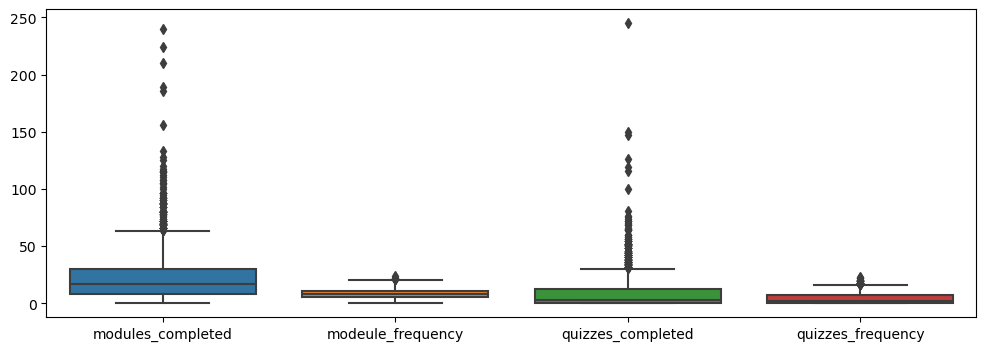

In [16]:
plt.figure(figsize=(12, 4))
sns.boxplot(data.drop(columns='user_id'))

## Build Model
### Scale Data

In [17]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['modules_completed', 'modeule_frequency', 'quizzes_completed', 'quizzes_frequency']])

### Features

In [18]:
X = scaled_data

### Instantiate Model

#### Find Optimal k

In [21]:
# Elbow Method for Optimal Clusters
wcss = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [24]:
wcss

[10136.000000000007,
 5168.335780434712,
 3768.0894172169933,
 3020.412208585604,
 2640.8900520330963,
 2286.7925372475834,
 2071.512251839027,
 1769.4472629580107,
 1645.4218673240728,
 1571.057482080867]

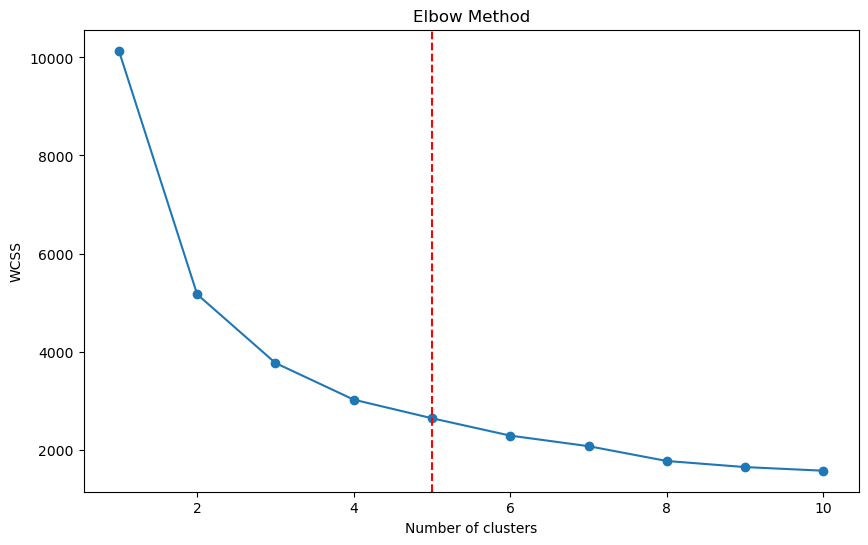

In [25]:
# Plot the Elbow diagram

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.axvline(x=5, color='r', linestyle='--') 
plt.show()

In [28]:
optimal_k = 5

In [29]:
kmeans = KMeans(n_clusters= optimal_k, random_state=42, n_init=1)

### Train Model

In [30]:
kmeans.fit(X)

KMeans(n_clusters=5, n_init=1, random_state=42)

### Evaluate Model

In [31]:
labels = kmeans.labels_
sil_score = silhouette_score(X, labels)
dbs_score = davies_bouldin_score(X, labels)

print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Score: {dbs_score}')

Silhouette Score: 0.37194758304921777
Davies-Bouldin Score: 1.0119728474774141


### PCA Dimensional Reduction

In [34]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

pca_components

array([[-0.41398858,  0.96805375],
       [-1.74143186,  0.14453509],
       [-0.30632683,  0.43036036],
       ...,
       [-2.03472561,  0.20125187],
       [-1.61716359,  0.00263716],
       [-1.8990428 ,  0.156754  ]])

### Visualise Clusters

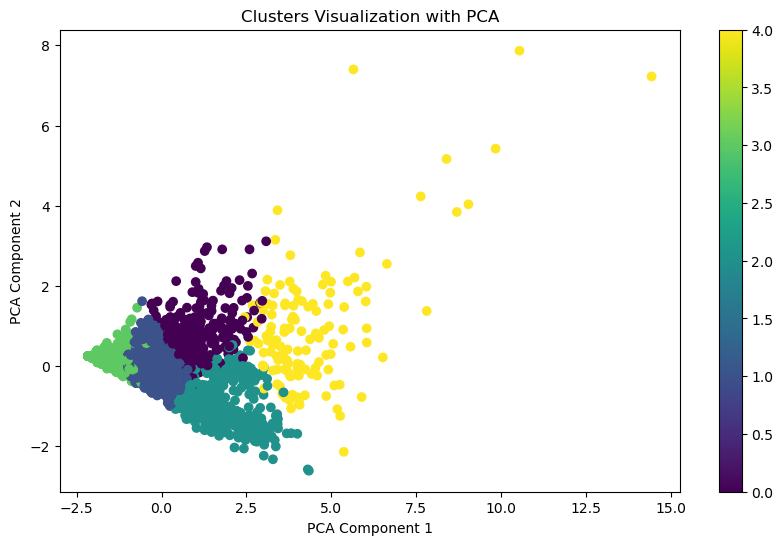

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=labels, cmap='viridis')
plt.title('Clusters Visualization with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

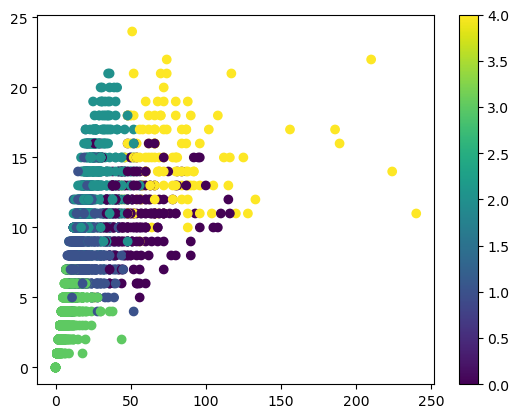

In [36]:
plt.scatter(data['modules_completed'], data['modeule_frequency'], c=labels, cmap='viridis')
plt.colorbar()

## Using Averages

In [48]:
df['Avg_completed'] = (df['modules_completed'] + df['quizzes_completed'])/2

df['Avg_frequency'] = (df['modeule_frequency'] + df['quizzes_frequency'])/2

df.head()

,user_id,modules_completed,modeule_frequency,quizzes_completed,quizzes_frequency,Avg_completion,Avg_completed,Avg_frequency
0,3022,39,6,3,1,21.0,21.0,3.5
1,507,4,3,0,0,2.0,2.0,1.5
2,2346,30,9,2,1,16.0,16.0,5.0
3,1515,14,7,22,12,18.0,18.0,9.5
4,1234,13,11,8,8,10.5,10.5,9.5


In [53]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Avg_completed', 'Avg_frequency']])

X_avg = scaled_data

X_avg

array([[ 0.31718605, -0.60402974],
       [-0.80946854, -1.08015117],
       [ 0.020698  , -0.24693867],
       ...,
       [-0.89841495, -1.31821188],
       [-0.80946854, -0.96112081],
       [-0.86876615, -1.19918153]])

In [50]:
kmeans_avg = KMeans(n_clusters= optimal_k, random_state=42, n_init=1)
kmeans_avg.fit(X_avg)

KMeans(n_clusters=5, n_init=1, random_state=42)

In [51]:
labels_avg = kmeans_avg.labels_
sil_score_avg = silhouette_score(X_avg, labels_avg)
dbs_score_avg = davies_bouldin_score(X, labels)

print(f'Silhouette Score: {sil_score_avg}')
print(f'Davies-Bouldin Score: {dbs_score_avg}')

Silhouette Score: 0.45905503562555644
Davies-Bouldin Score: 1.0119728474774141


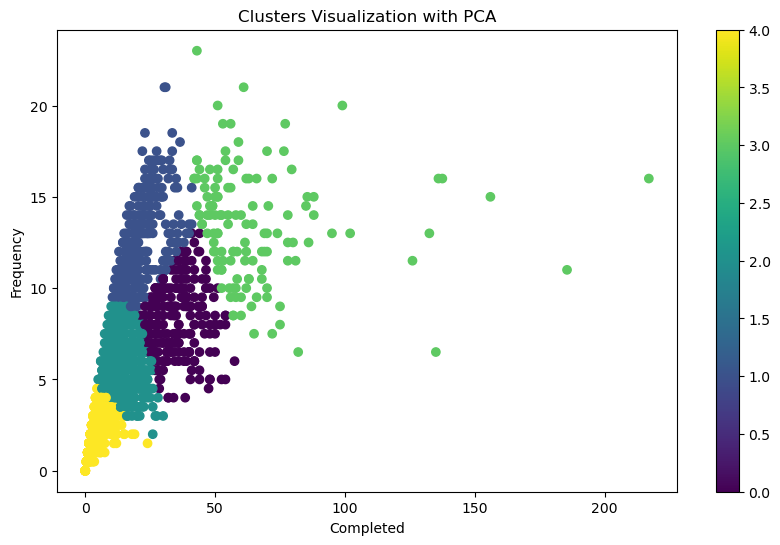

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Avg_completed'], df['Avg_frequency'], c=labels_avg, cmap='viridis')
plt.title('Clusters Visualization with PCA')
plt.xlabel('Completed')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

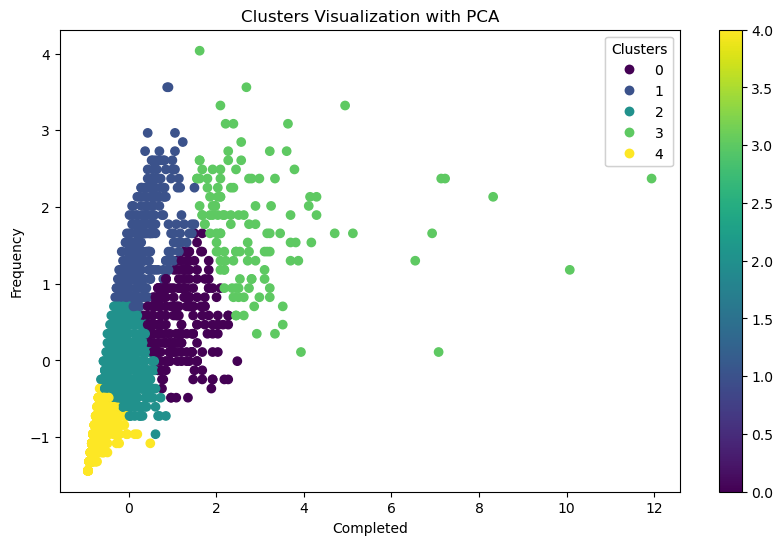

In [59]:

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_avg[:, 0], X_avg[:, 1], c=labels_avg, cmap='viridis')
plt.title('Clusters Visualization with PCA')

# Create a legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.xlabel('Completed')
plt.ylabel('Frequency')
plt.colorbar(scatter)
plt.show()


## Final Table

In [ ]:
# Map clusters to badges
badges = {0: 'Platinum', 1: 'Gold', 2: 'Silver', 3: 'Bronze'}
data['badge'] = labels.map(badges)

# Add badges as a column to the original df
data.head()

## Conclusion


Observation:
- The clustering algorithm grouped users based on their activity in terms of module completion, module frequency, quizzes completed, and quizzes frequency.
- The Silhouette Score and Davies-Bouldin Score indicate the quality of the clusters.

Challenges:
- Choosing the optimal number of clusters was challenging and may require further tuning.
- The clustering is sensitive to the scale of the features, hence scaling was crucial.

Further Work:
- Experiment with different clustering algorithms such as DBSCAN or hierarchical clustering.
- Analyze the clusters further to understand user behaviors and improve the badge assignment system.
